In [17]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import keras
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join

In [18]:
img_width = 150
img_height = 150

train_data_dir = 'D:\\IITG\\Placement\\Python\\catdog\\train'
validation_data_dir = 'D:\\IITG\\Placement\\Python\\catdog\\valid'
train_samples = 2000
validation_samples = 400
epochs = 5
batch_size = 20

# Check for TensorFlow or Thieno
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [19]:
model = Sequential()
# Conv2D : Two dimenstional convulational model.
# 32 : Input for next layer
# (3,3) convulonational windows size
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [20]:
model.save(r"D:\IITG\Placement\Python\catdog\Catdog.model")

INFO:tensorflow:Assets written to: D:\IITG\Placement\Python\catdog\Catdog.model\assets


INFO:tensorflow:Assets written to: D:\IITG\Placement\Python\catdog\Catdog.model\assets


In [21]:
import keras
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=keras.optimizers.Adam(lr=.0001),
              metrics=['accuracy'])

c:\Users\PS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [22]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [23]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [24]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [25]:
print(train_generator.class_indices)

{'cats': 0, 'dogs': 1}


In [26]:
imgs, labels = next(train_generator)

In [27]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

20
1.0


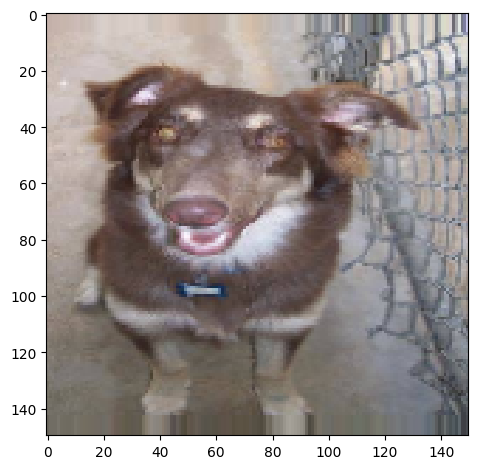

0.0


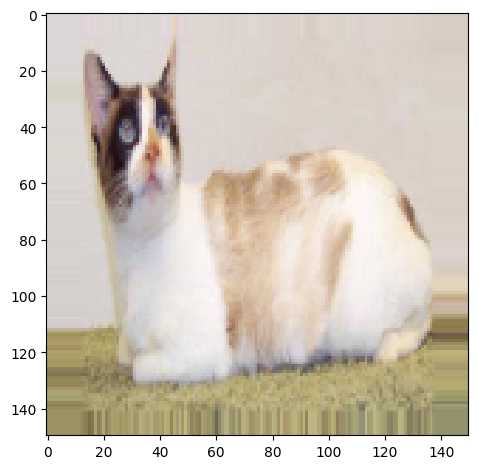

0.0


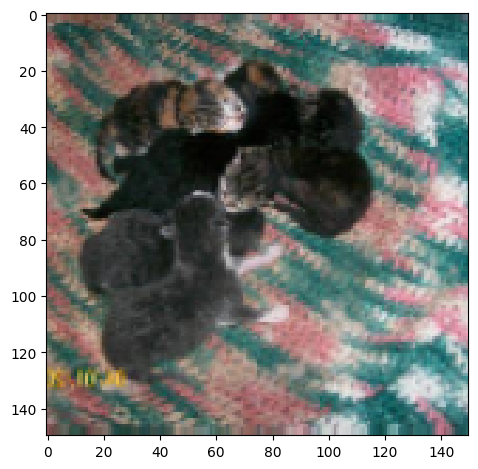

0.0


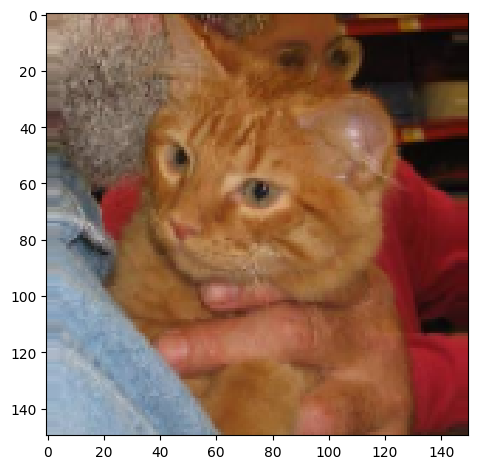

1.0


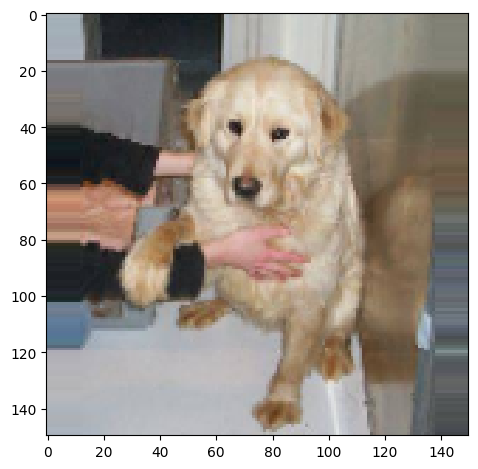

1.0


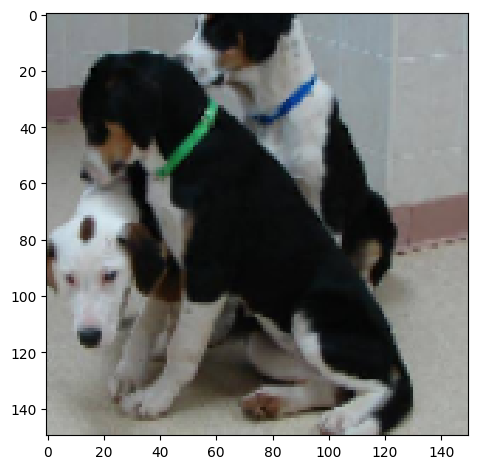

0.0


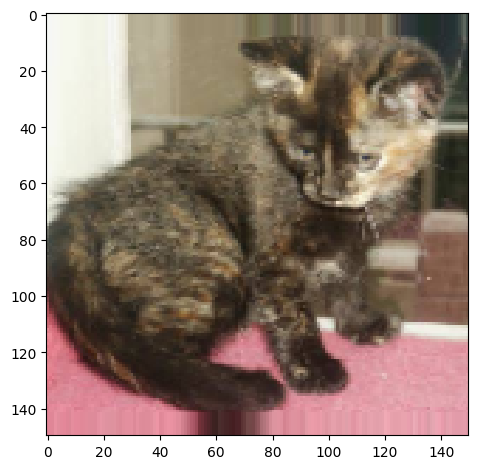

0.0


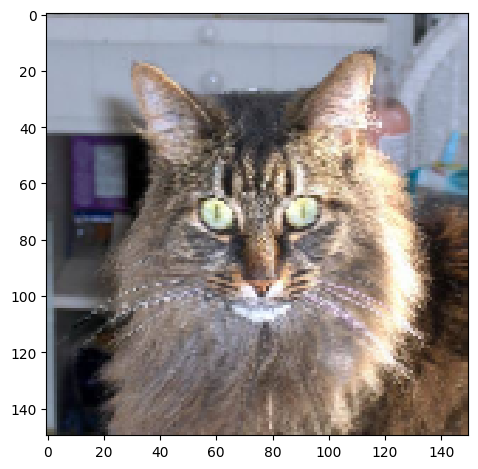

0.0


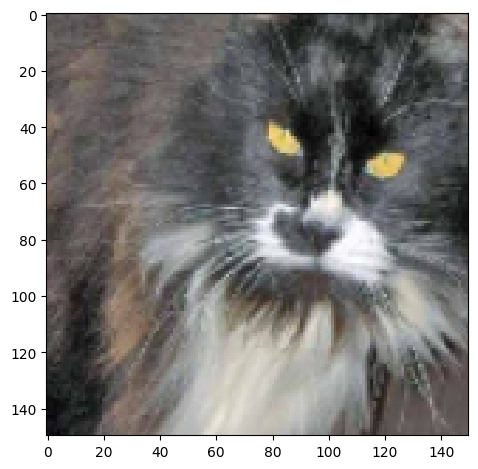

1.0


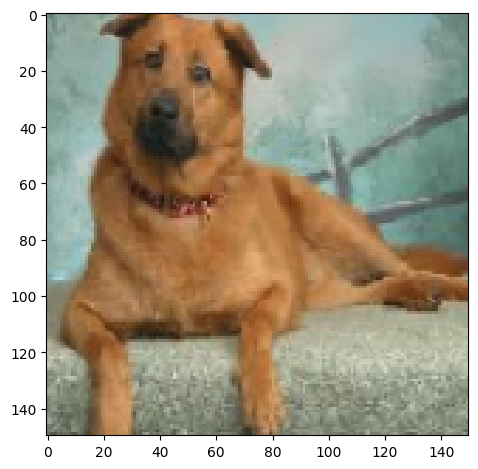

1.0


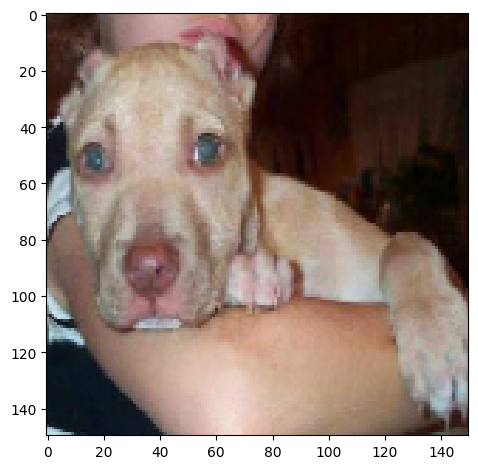

1.0


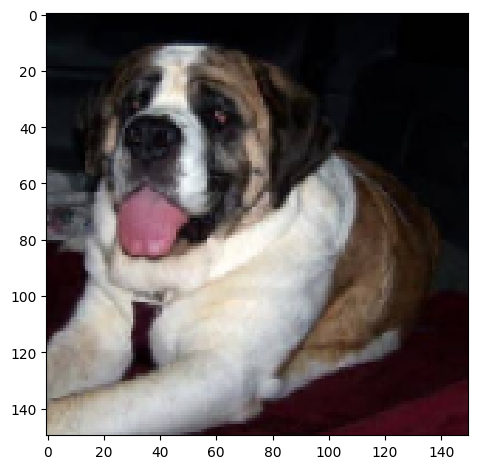

1.0


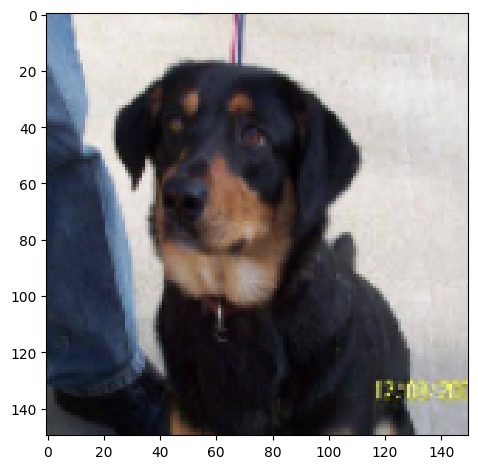

0.0


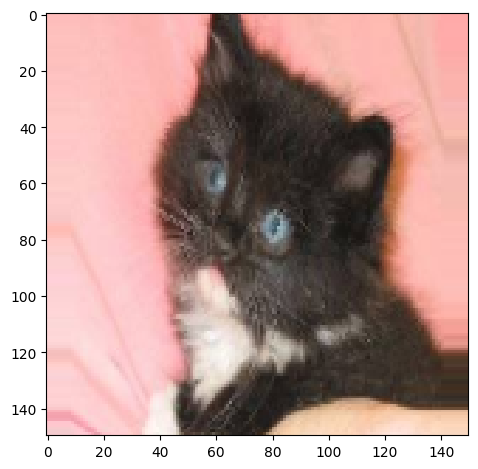

1.0


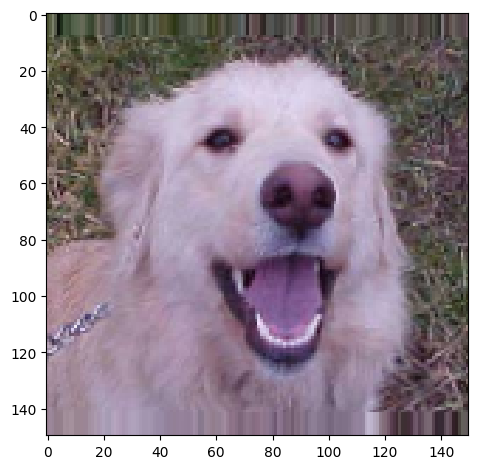

1.0


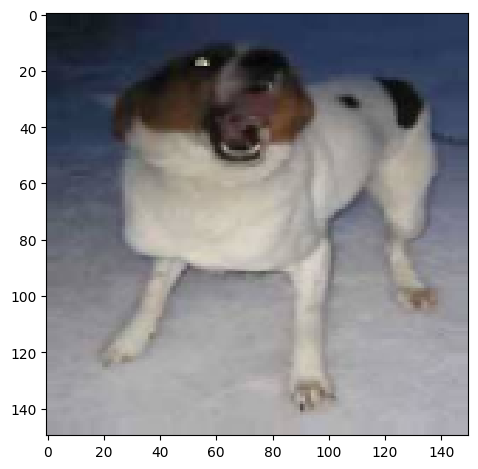

1.0


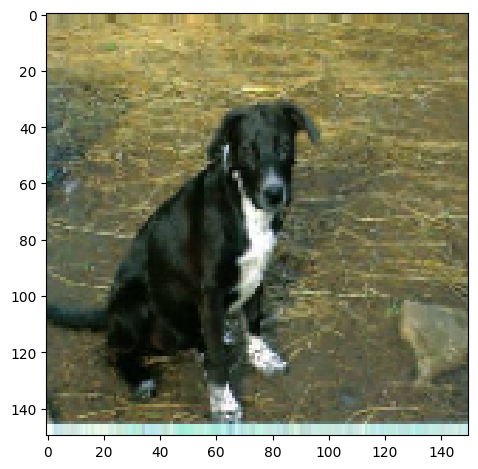

0.0


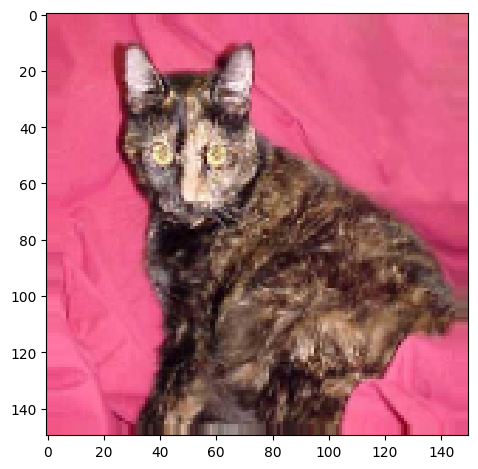

1.0


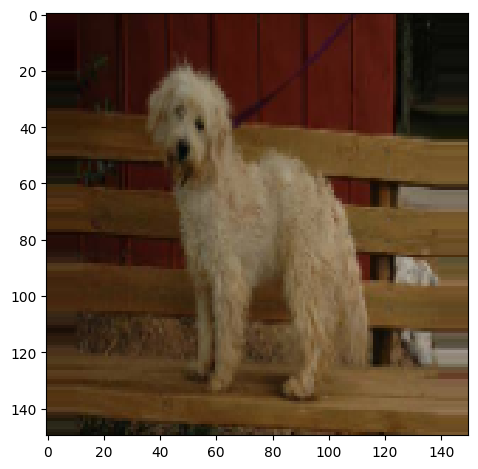

1.0


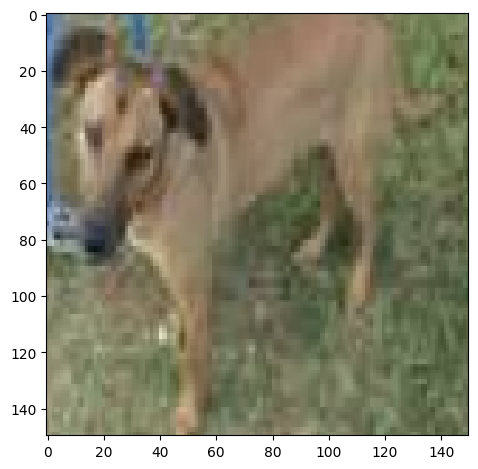

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [29]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 400 images belonging to 2 classes.


In [30]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)

C:\Users\PS\AppData\Local\Temp\ipykernel_8824\2998474161.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/5
100/100 [==============================] - 73s 719ms/step - loss: 0.6939 - accuracy: 0.5205 - val_loss: 0.6850 - val_accuracy: 0.5100
Epoch 2/5
100/100 [==============================] - 55s 547ms/step - loss: 0.6817 - accuracy: 0.5600 - val_loss: 0.6789 - val_accuracy: 0.5100
Epoch 3/5
100/100 [==============================] - 56s 562ms/step - loss: 0.6611 - accuracy: 0.6100 - val_loss: 0.6430 - val_accuracy: 0.6600
Epoch 4/5
100/100 [==============================] - 63s 626ms/step - loss: 0.6442 - accuracy: 0.6425 - val_loss: 0.6236 - val_accuracy: 0.6600
Epoch 5/5
100/100 [==============================] - 63s 628ms/step - loss: 0.6203 - accuracy: 0.6635 - val_loss: 0.5973 - val_accuracy: 0.7000


In [31]:
model_name= "D:\\IITG\\Placement\\Python\\catdog.h5"
tf.keras.models.save_model(model,model_name)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


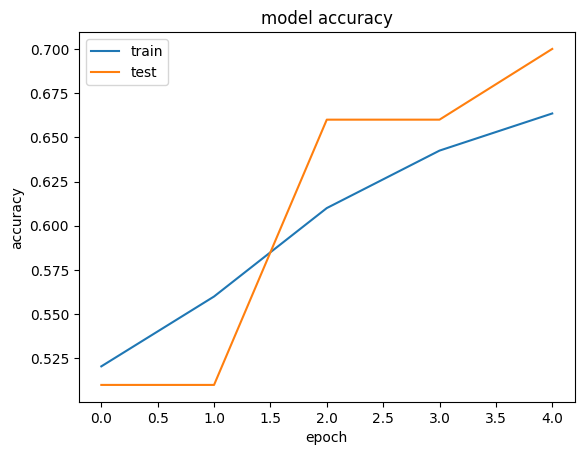

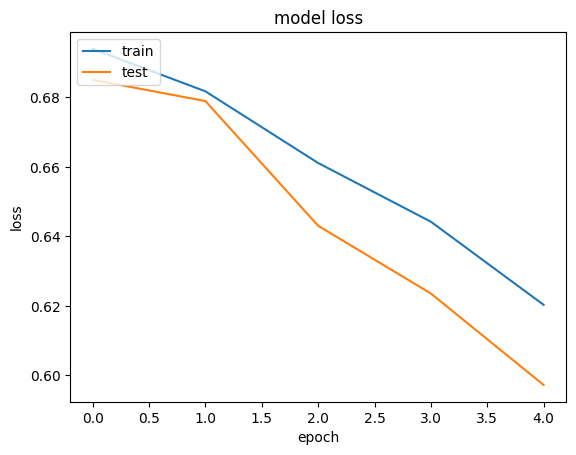

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
predict_dir_path='D:\\IITG\\Placement\\Python\\catdog\\test\\'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['1.jpg', '10.jpg', '11.jpg', '12.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', 'cat_t (12).jpg', 'cat_t (13).jpg', 'cat_t (14).jpg', 'cat_t (15).jpg', 'cat_t (16).jpg', 'cat_t (20).jpg', 'cat_t (21).jpg', 'cat_t (22).jpg', 'cat_t (23).jpg', 'cat_t (24).jpg', 'cat_t (28).jpg', 'cat_t (29).jpg', 'cat_t (30).jpg', 'cat_t (31).jpg', 'cat_t (32).jpg', 'dog_t (100).jpg', 'dog_t (101).jpg', 'dog_t (102).jpg', 'dog_t (103).jpg', 'dog_t (104).jpg', 'dog_t (84).jpg', 'dog_t (85).jpg', 'dog_t (86).jpg', 'dog_t (87).jpg', 'dog_t (88).jpg', 'dog_t (92).jpg', 'dog_t (93).jpg', 'dog_t (94).jpg', 'dog_t (95).jpg', 'dog_t (96).jpg']


In [34]:
# predicting images
from keras.preprocessing import image
dog_counter = 0 
cat_counter  = 0
for file in onlyfiles:
    img = keras.utils.load_img(predict_dir_path+file, target_size=(img_width, img_height))
    x = keras.utils.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    
    classes = (model.predict(images, batch_size=10) > 0.5).astype("int32")
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'cat')
        cat_counter += 1
    else:
        print(file + ": " + 'dog')
        dog_counter += 1
print("Total Dogs :",dog_counter)
print("Total Cats :",cat_counter)

1/1 [==============================] - 0s 136ms/step
1.jpg: dog
1/1 [==============================] - 0s 38ms/step
10.jpg: dog
1/1 [==============================] - 0s 38ms/step
11.jpg: cat
1/1 [==============================] - 0s 37ms/step
12.jpg: dog
1/1 [==============================] - 0s 37ms/step
2.jpg: dog
1/1 [==============================] - 0s 42ms/step
3.jpg: dog
1/1 [==============================] - 0s 37ms/step
4.jpg: dog
1/1 [==============================] - 0s 36ms/step
5.jpg: dog
1/1 [==============================] - 0s 38ms/step
6.jpg: dog
1/1 [==============================] - 0s 40ms/step
7.jpg: dog
1/1 [==============================] - 0s 44ms/step
8.jpg: cat
1/1 [==============================] - 0s 37ms/step
9.jpg: dog
1/1 [==============================] - 0s 37ms/step
cat_t (12).jpg: dog
1/1 [==============================] - 0s 37ms/step
cat_t (13).jpg: cat
1/1 [==============================] - 0s 37ms/step
cat_t (14).jpg: cat
1/1 [===================